[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kavoshgaran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Kavoshgaran\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kavoshgaran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


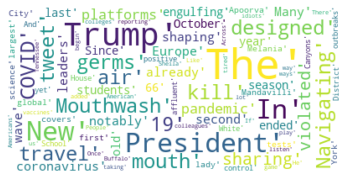

In [4]:
import spacy
import en_core_web_lg
from newsapi import NewsApiClient
import pickle
import pandas as pd
import string
import numpy as np
from collections import Counter 
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud 
from textblob import TextBlob
nltk.download('stopwords')
nltk.download('brown')
nltk.download('punkt')



nlp_eng = en_core_web_lg.load()
newsapi = NewsApiClient(api_key='7fdd45ab5b5540b580b66520b94021ed') #API key is available at https://newsapi.org/

temp = newsapi.get_everything(q='coronavirus', language='en', from_param='2020-10-01', to='2020-10-26', sort_by='relevancy')

filename = 'articlesCOVID.pckl'
pickle.dump(temp, open(filename, 'wb'))
filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))
# filepath = '/content/articlesCOVID.pckl'
# pickle.dump(loaded_model, open(filepath, 'wb'))

df = pd.DataFrame(temp['articles'])

#df['description']

tokenizer = RegexpTokenizer(r'\w+')

def get_keywords_eng(token):
  result = []
  punctuation = string.punctuation
  stop_words = stopwords.words('english')
  
  for i in token:
    if (i in stop_words):
      continue
    else:
      result.append(i)

  return result


results = []
for content in df.content.values:
    content = tokenizer.tokenize(content)
    results.append([x[0] for x in Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results


#for plotting
text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [5]:
df.head(5)


source  \
0    {'id': None, 'name': 'Lifehacker.com'}   
1    {'id': None, 'name': 'Lifehacker.com'}   
2  {'id': 'the-verge', 'name': 'The Verge'}   
3    {'id': None, 'name': 'New York Times'}   
4    {'id': None, 'name': 'New York Times'}   

                                              author  \
0  Beth Skwarecki on Vitals, shared by Beth Skwar...   
1                                     Elizabeth Yuko   
2                                          Kim Lyons   
3                                 Michael Kolomatsky   
4                                     Jonathan Wolfe   

                                               title  \
0          Sorry, Mouthwash Isn't a Coronavirus Cure   
1  Check an Airline's Coronavirus Policies Before...   
2  Twitter flags, limits sharing on Trump tweet a...   
3                        Coronavirus and Home Design   
4          Coronavirus Briefing: What Happened Today   

                                         description  \
0  Mouthwash is designed to kill germs in your mo...   
1  Navigating air travel during the COVID-19 pand...   
2  Twitter disabled sharing options on a tweet fr...   
3  A recent survey of architects reveals that cli...   
4                      What the near future may hold   

                                                 url  \
0  https://vitals.lifehacker.com/sorry-mouthwash-...   
1  https://lifehacker.com/check-an-airlines-coron...   
2  https://www.theverge.com/2020/10/11/21511682/t...   
3  https://www.nytimes.com/2020/10/22/realestate/...   
4  https://www.nytimes.com/2020/10/12/us/coronavi...   

                                          urlToImage           publishedAt  \
0  https://i.kinja-img.com/gawker-media/image/upl...  2020-10-21T19:45:00Z   
1  https://i.kinja-img.com/gawker-media/image/upl...  2020-10-21T16:00:00Z   
2  https://cdn.vox-cdn.com/thumbor/1zez70uv4JdlHC...  2020-10-11T19:11:34Z   
3  https://static01.nyt.com/images/2020/10/22/rea...  2020-10-22T13:00:08Z   
4  https://static01.nyt.com/images/2020/03/03/wor...  2020-10-12T22:12:24Z   

                                             content  \
0  Mouthwash is designed to kill germs in your mo...   
1  Navigating air travel during the COVID-19 pand...   
2  The tweet violated the platforms rules against...   
3  The coronavirus pandemic is already shaping ho...   
4  Many leaders most notably President Trump have...   

                                         keywords  
0       [Mouthwash, designed, kill, germs, mouth]  
1            [Navigating, air, travel, COVID, 19]  
2      [The, tweet, sharing, violated, platforms]  
3  [pandemic, The, coronavirus, already, shaping]  
4      [Many, leaders, notably, President, Trump]

In [6]:
results

[['Mouthwash', 'designed', 'kill', 'germs', 'mouth'],
 ['Navigating', 'air', 'travel', 'COVID', '19'],
 ['The', 'tweet', 'sharing', 'violated', 'platforms'],
 ['pandemic', 'The', 'coronavirus', 'already', 'shaping'],
 ['Many', 'leaders', 'notably', 'President', 'Trump'],
 ['In', 'Europe', 'second', 'wave', 'engulfing'],
 ['students', 'The', '66', 'year', 'old'],
 ['Since', 'season', 'ended', 'October', 'last'],
 ['Apoorva', 'Mandavilli', 'covers', 'science', 'global'],
 ['In', 'New', 'York', 'City', 'largest'],
 ['Trump', 'The', 'first', 'lady', 'Melania'],
 ['President', 'Trump', 'tests', 'positive', 'new'],
 ['control', 'The', 'outbreaks', 'White', 'House'],
 ['The', 'Canyons', 'School', 'District', 'affluent'],
 ['And', 'yet', 'reporting', 'colleagues', 'Sheila'],
 ['Americans', 'Once', 'begin', 'taking', 'vaccines'],
 ['way', 'Like', 'Across', 'American', 'colleges'],
 ['idiots', 'He', 'added', 'People', 'tired'],
 ['us', 'There', 'lot', 'ways', 'listen'],
 ['game', 'If', 'Tennesse